In [1]:
# from a question on slack, let's check the r-band surface brightness limit per year
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import time



In [2]:
baseline_file = get_baseline()
runName = os.path.split(baseline_file)[-1].replace('.db', '')


In [3]:
outDir = 'temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)


In [6]:
bundle_list = []
slicer = maf.HealpixSlicer()
metric = maf.SurfaceBrightLimitMetric()

summary_stats = [maf.MedianMetric(), maf.MeanMetric()]

for year in np.arange(10)+1:
    sql = 'filter="r" and night < %f' % (365.25*year)
    bundle = maf.MetricBundle(metric, slicer, sql,
                            summaryMetrics=summary_stats, runName=runName)
    bundle_list.append(bundle)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying table None with constraint filter="r" and night < 2922.000000 for columns ['fieldRA', 'visitExposureTime', 'skyBrightness', 'rotSkyPos', 'numExposures', 'fieldDec', 'filter', 'airmass']
Found 372141 visits
Running:  ['opsim_SurfaceBrightLimit_r_and_night_lt_2922_000000_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter="r" and night < 1095.750000 for columns ['fieldRA', 'visitExposureTime', 'skyBrightness', 'rotSkyPos', 'numExposures', 'fieldDec', 'filter', 'airmass']
Found 137086 visits
Running:  ['opsim_SurfaceBrightLimit_r_and_night_lt_1095_750000_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter="r" and night < 2556.750000 for columns ['fieldRA', 'visitExposureTime', 'skyBrightness', 'rotSkyPos', 'numExposures', 'fieldDec', 'filter', 'airmass']
Found 325669 visits
Running:  ['opsim_SurfaceBrig

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 236 bins, returning 200
  warnings.warn(


Plotting complete.
Plotting figures with "filter="r" and night < 1095.750000" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 242 bins, returning 200
  warnings.warn(


Plotting complete.
Plotting figures with "filter="r" and night < 2556.750000" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 234 bins, returning 200
  warnings.warn(


Plotting complete.
Plotting figures with "filter="r" and night < 730.500000" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 251 bins, returning 200
  warnings.warn(


Plotting complete.
Plotting figures with "filter="r" and night < 2191.500000" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 233 bins, returning 200
  warnings.warn(


Plotting complete.
Plotting figures with "filter="r" and night < 3287.250000" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 239 bins, returning 200
  warnings.warn(


Plotting complete.
Plotting figures with "filter="r" and night < 365.250000" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 274 bins, returning 200
  warnings.warn(


Plotting complete.
Plotting figures with "filter="r" and night < 1826.250000" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 234 bins, returning 200
  warnings.warn(


Plotting complete.
Plotting figures with "filter="r" and night < 3652.500000" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 239 bins, returning 200
  warnings.warn(


Plotting complete.
Plotting figures with "filter="r" and night < 1461.000000" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 241 bins, returning 200
  warnings.warn(


Plotting complete.


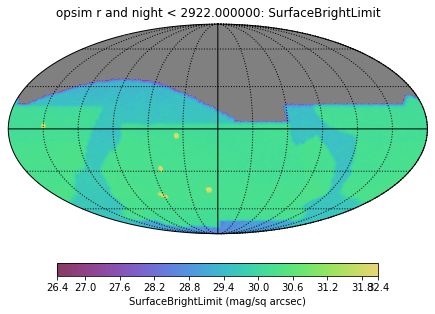

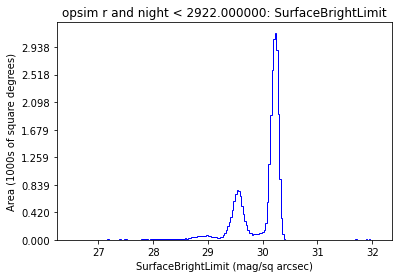

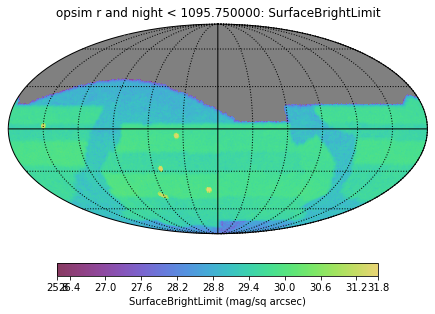

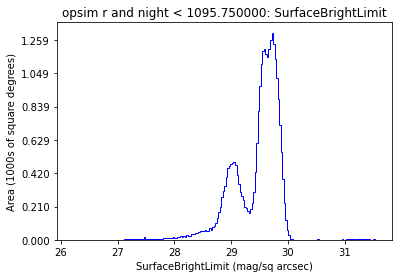

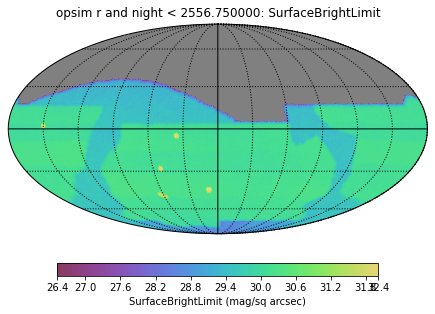

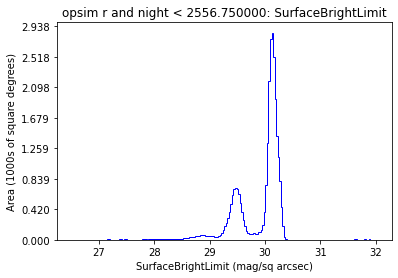

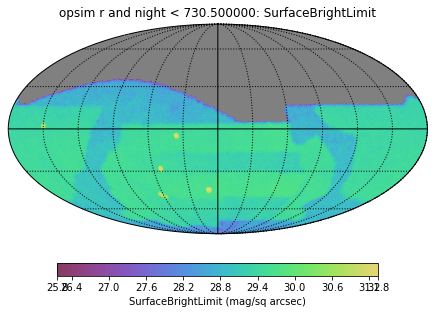

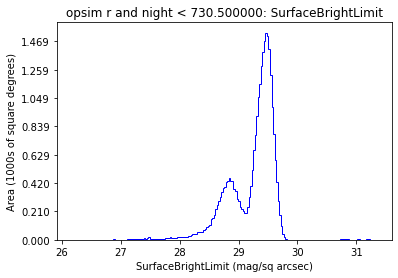

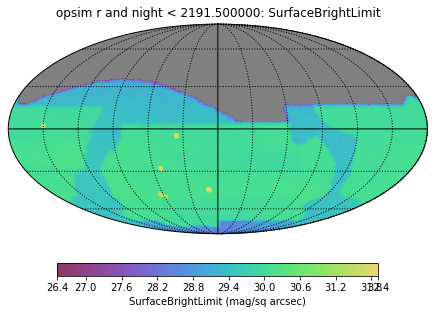

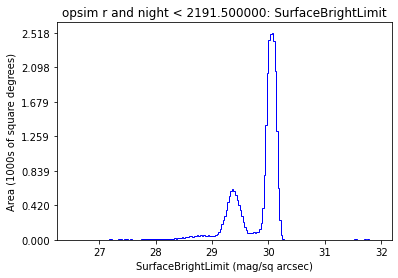

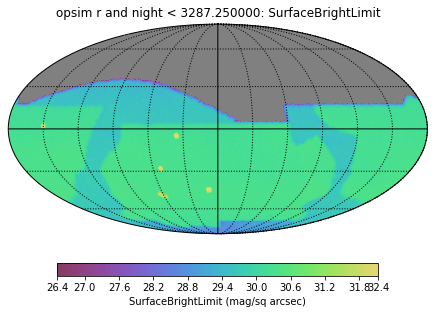

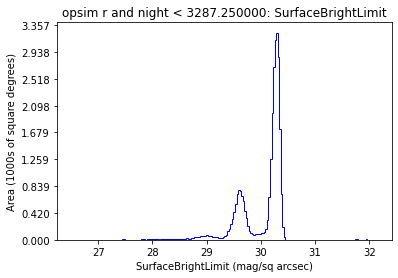

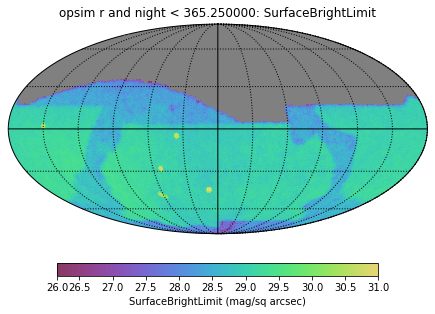

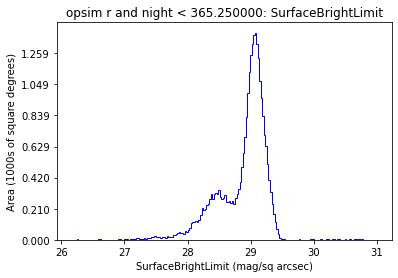

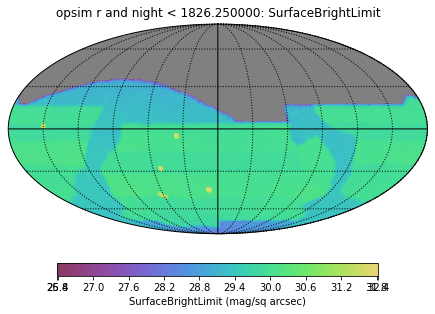

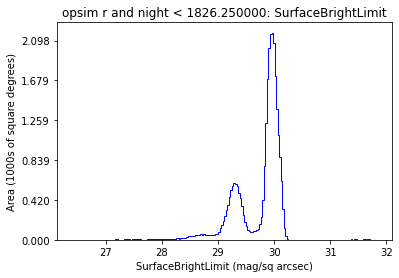

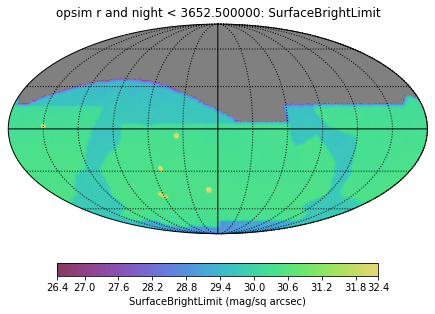

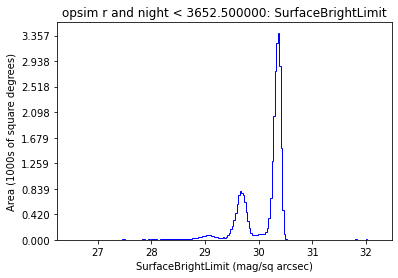

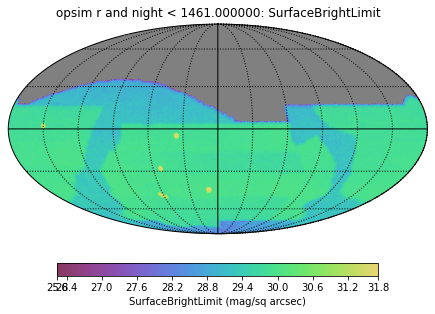

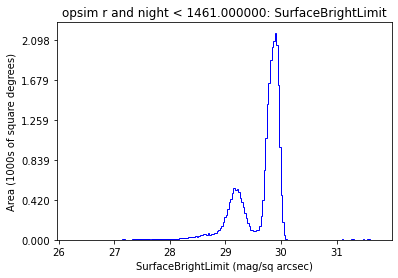

In [8]:
bg = maf.MetricBundleGroup(bundle_list, baseline_file, outDir=outDir)

bg.runAll()     
bg.plotAll(closefigs=False)

In [12]:
for i,b in enumerate(bundle_list):
    print('year %i' % i, b.summaryValues['Median'])

year 0 28.99594154818552
year 1 29.364454601724766
year 2 29.57193566228397
year 3 29.79466388751559
year 4 29.908544499947144
year 5 30.003427422721085
year 6 30.091863992531
year 7 30.17316018328577
year 8 30.231615280742368
year 9 30.300582715345342


In [13]:
365.25*5

1826.25